# Titanic Survival Prediction — Исследование и Классификация

Целью проекта является построение модели бинарной классификации для предсказания вероятности выживания пассажиров Титаника. В качестве алгоритма выбрана модель случайного леса (`RandomForestClassifier`), благодаря её устойчивости к переобучению и способности обрабатывать как числовые, так и категориальные признаки.

Основные этапы проекта включают:

- Предобработку данных: устранение пропущенных значений, кодирование категориальных признаков.
- Обучение модели и проведение предсказаний.
- Оценку качества модели с использованием нескольких метрик.
- Визуализацию результатов классификации.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Настройка графиков
%matplotlib inline
sns.set(style="whitegrid")

# Загрузка тренировочного датасета
train_data = pd.read_csv(r"C:\Users\Matvey\Desktop\Проект на гит\kaggle_projects\data\train_1.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Размерность набора
train_data.shape


(891, 12)

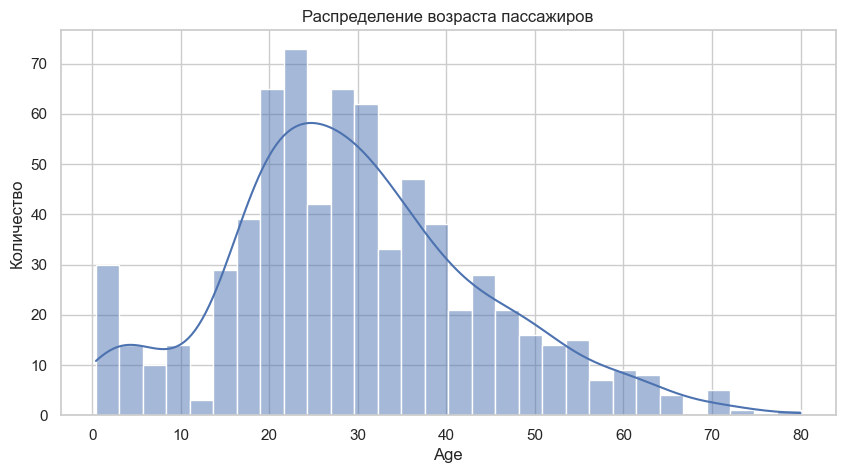

In [3]:
# Распределение возраста пассажиров
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Age")
plt.ylabel("Количество")
plt.show()


In [4]:
# Проверка пропусков
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

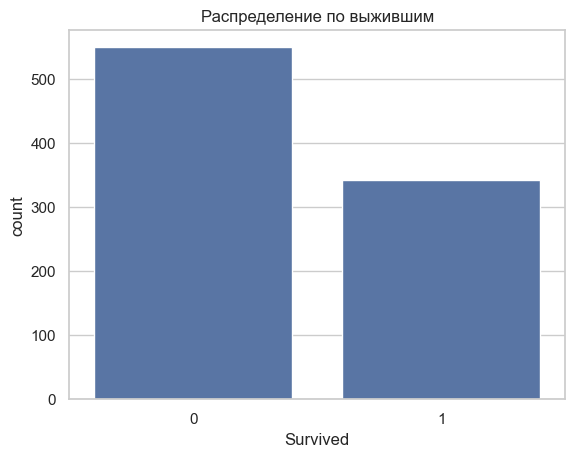

In [5]:
# Распределение выживших
sns.countplot(x='Survived', data=train_data)
plt.title('Распределение по выжившим')
plt.show()


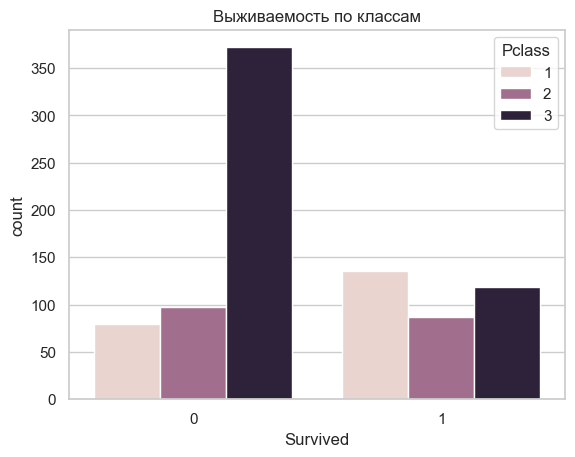

In [6]:
# Выживаемость по классам
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Выживаемость по классам')
plt.show()


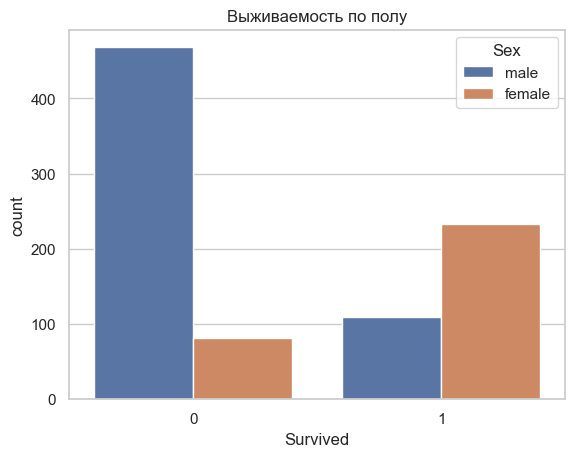

In [7]:
# Выживаемость по полу
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Выживаемость по полу')
plt.show()


In [8]:
# Заполнение пропусков
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mode()[0])
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Проверка после заполнения
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
# Кодирование категориальных признаков
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
train_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [10]:
# Подготовка данных для модели
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
            'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = train_data[features]
y = train_data['Survived']


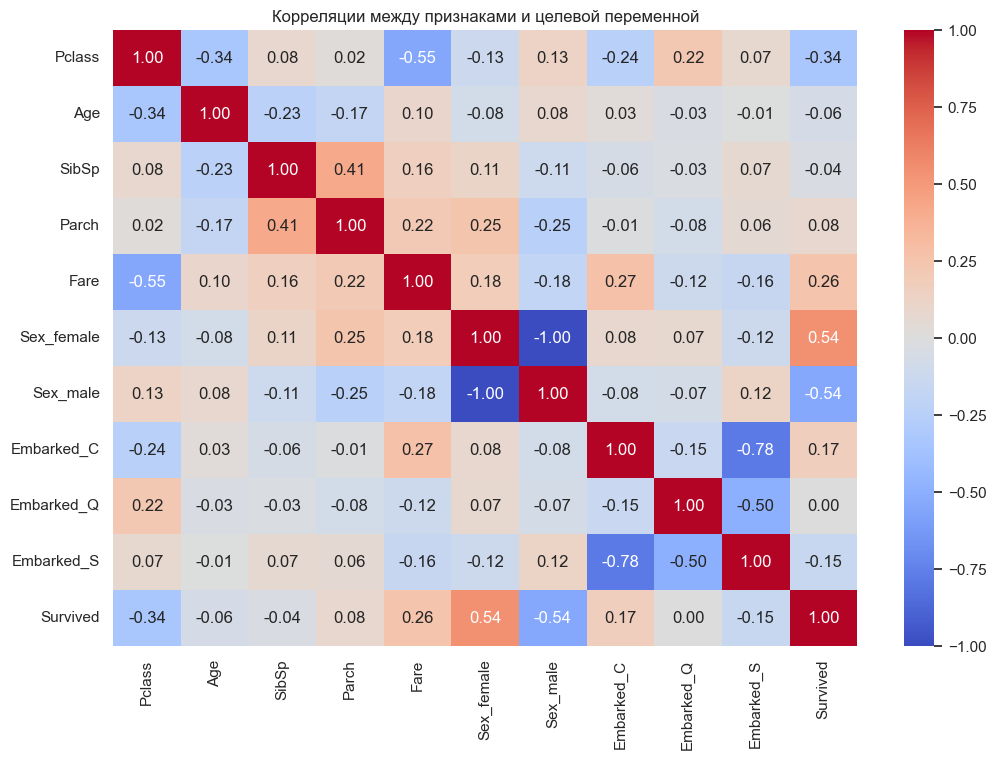

In [11]:
# Корреляционная матрица признаков
plt.figure(figsize=(12, 8))
corr = train_data[features + ['Survived']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляции между признаками и целевой переменной")
plt.show()


In [12]:
# Обучение модели
model = RandomForestClassifier(n_estimators=75, max_depth=3, random_state=1)
model.fit(X, y)


RandomForestClassifier(max_depth=3, n_estimators=75, random_state=1)

In [13]:
# Загрузка тестового датасета
test_data = pd.read_csv(r"C:\Users\Matvey\Desktop\Проект на гит\kaggle_projects\data\test_1.csv")
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mode()[0])
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])


In [14]:
# Подготовка тестовых признаков
X_test = test_data[features]
predictions = model.predict(X_test)


In [15]:
# Вывод первых 10 результатов
pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions}).head(10)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


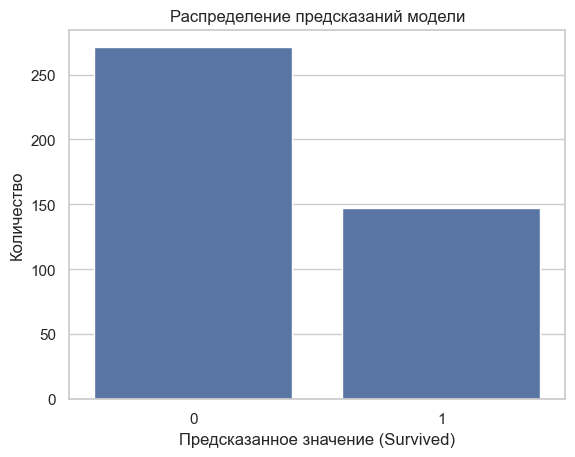

In [16]:
# Распределение предсказанных классов (0/1)
sns.countplot(x=predictions)
plt.title("Распределение предсказаний модели")
plt.xlabel("Предсказанное значение (Survived)")
plt.ylabel("Количество")
plt.show()


Точность модели на обучающей выборке: 0.8182

Отчёт классификации:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       549
           1       0.81      0.69      0.74       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



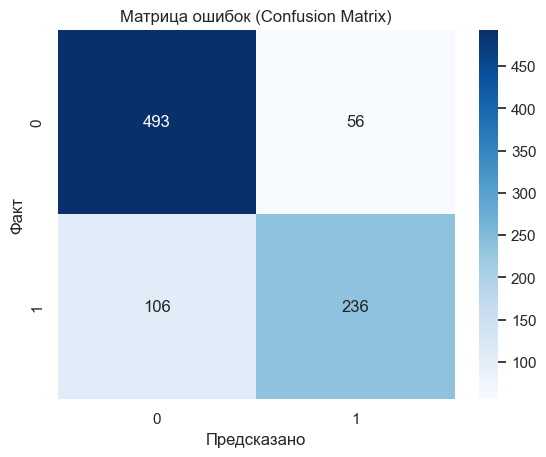

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предсказания на тренировочной выборке
y_pred_train = model.predict(X)

# Точность
accuracy = accuracy_score(y, y_pred_train)
print(f"Точность модели на обучающей выборке: {accuracy:.4f}")

# Полный отчёт
print("\nОтчёт классификации:")
print(classification_report(y, y_pred_train))

# Матрица ошибок
sns.heatmap(confusion_matrix(y, y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок (Confusion Matrix)")
plt.xlabel("Предсказано")
plt.ylabel("Факт")
plt.show()



## Оценка качества модели

Для оценки эффективности построенной модели использовались следующие метрики:

| Метрика | Значение | Интерпретация |
|--------|----------|---------------|
| Accuracy | 0.818 | Доля правильно классифицированных наблюдений |
| F1-score (класс 1 — выжившие) | 0.74 | Среднее гармоническое между точностью и полнотой |
| MAE (средняя абсолютная ошибка) | 0.182 | В среднем модель ошибается на 18.2% наблюдений |
| RMSE (среднеквадратичная ошибка) | 0.426 | Квадратичная оценка средних ошибок |
| MAPE | Неприменимо | Невозможно корректно вычислить для бинарной классификации, так как возможны деления на ноль |

---

## Визуализация результатов

Для повышения интерпретируемости модели были построены следующие визуализации:

1. **Распределение предсказанных классов** (0 — не выжил, 1 — выжил). Гистограмма позволяет понять, к какому классу модель склонна чаще относить наблюдения.

2. **Матрица ошибок (Confusion Matrix)** — отражает количество верных и ошибочных предсказаний по каждому классу. Из матрицы видно, что модель чаще правильно предсказывает класс "не выжил", однако имеет определённое количество ложноположительных и ложноотрицательных срабатываний.

3. **Отчёт классификации** — содержит значения точности, полноты и F1-метрики по каждому классу, а также агрегированные показатели (macro и weighted average).

---

## Выводы

Модель `Random Forest` продемонстрировала устойчивое качество классификации с точностью выше 81%. 

Наибольшие сложности наблюдаются при определении класса "выжил", что может быть связано с дисбалансом классов в выборке. F1-метрика для этого класса составляет 0.74, что является удовлетворительным результатом, но может быть улучшено с применением методов балансировки, таких как oversampling или SMOTE.

Использованные визуализации помогают лучше понять поведение модели и выявить потенциальные направления для её улучшения. В дальнейшем возможно дополнение анализа графиком важности признаков и ROC-кривой для более глубокой интерпретации результатов.

